In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv(r"C:\Users\User\Downloads\credit_risk_dataset.csv")

In [3]:
df

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


In [4]:
df.shape

(32581, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [6]:
df.dtypes

person_age                      int64
person_income                   int64
person_home_ownership          object
person_emp_length             float64
loan_intent                    object
loan_grade                     object
loan_amnt                       int64
loan_int_rate                 float64
loan_status                     int64
loan_percent_income           float64
cb_person_default_on_file      object
cb_person_cred_hist_length      int64
dtype: object

**Duplicates**

In [7]:
df.duplicated().sum()

165

In [8]:
df.drop_duplicates(inplace = True)

In [9]:
df.duplicated().sum()

0

**Missing Values**

In [10]:
df.isna().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              887
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3095
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [11]:
df.shape

(32416, 12)

In [12]:
df['person_emp_length'] = df['person_emp_length'].fillna(df['person_emp_length'].median())
df['loan_int_rate'] = df['loan_int_rate'].fillna(df['loan_int_rate'].median())

In [13]:
df.isna().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

**Structural Error**

In [14]:
for i in df.columns:
    print(i , df[i].unique())

person_age [ 22  21  25  23  24  26 144 123  20  32  34  29  33  28  35  31  27  30
  36  40  50  45  37  39  44  43  41  46  38  47  42  48  49  58  65  51
  53  66  61  54  57  59  62  60  55  52  64  70  78  69  56  73  63  94
  80  84  76  67]
person_income [  59000    9600   65500 ...  720000 1900000    4888]
person_home_ownership ['RENT' 'OWN' 'MORTGAGE' 'OTHER']
person_emp_length [123.   5.   1.   4.   8.   2.   6.   7.   0.   9.   3.  10.  11.  18.
  12.  17.  14.  16.  13.  19.  15.  20.  22.  21.  24.  23.  26.  25.
  27.  28.  31.  41.  34.  29.  38.  30.]
loan_intent ['PERSONAL' 'EDUCATION' 'MEDICAL' 'VENTURE' 'HOMEIMPROVEMENT'
 'DEBTCONSOLIDATION']
loan_grade ['D' 'B' 'C' 'A' 'E' 'F' 'G']
loan_amnt [35000  1000  5500  2500  1600  4500 30000  1750 34800 34000  1500 33950
 33000  4575  1400 32500  4000  2000 32000 31050 24250  7800 20000 10000
 25000 18000 12000 29100 28000  9600  3000  6100  4200  4750  4800  2700
 27600  3250 27500 27050 27000 26000 25600 25475 21600 11900

**Outliers**

In [15]:
df_cat = df.select_dtypes(exclude=['int' , 'float'])

In [16]:
df_numeric = df.select_dtypes(include=['int' , 'float'])

person_age                       Axes(0.125,0.712609;0.352273x0.167391)
person_income                 Axes(0.547727,0.712609;0.352273x0.167391)
person_emp_length                Axes(0.125,0.511739;0.352273x0.167391)
loan_amnt                     Axes(0.547727,0.511739;0.352273x0.167391)
loan_int_rate                     Axes(0.125,0.31087;0.352273x0.167391)
loan_status                    Axes(0.547727,0.31087;0.352273x0.167391)
loan_percent_income                  Axes(0.125,0.11;0.352273x0.167391)
cb_person_cred_hist_length        Axes(0.547727,0.11;0.352273x0.167391)
dtype: object

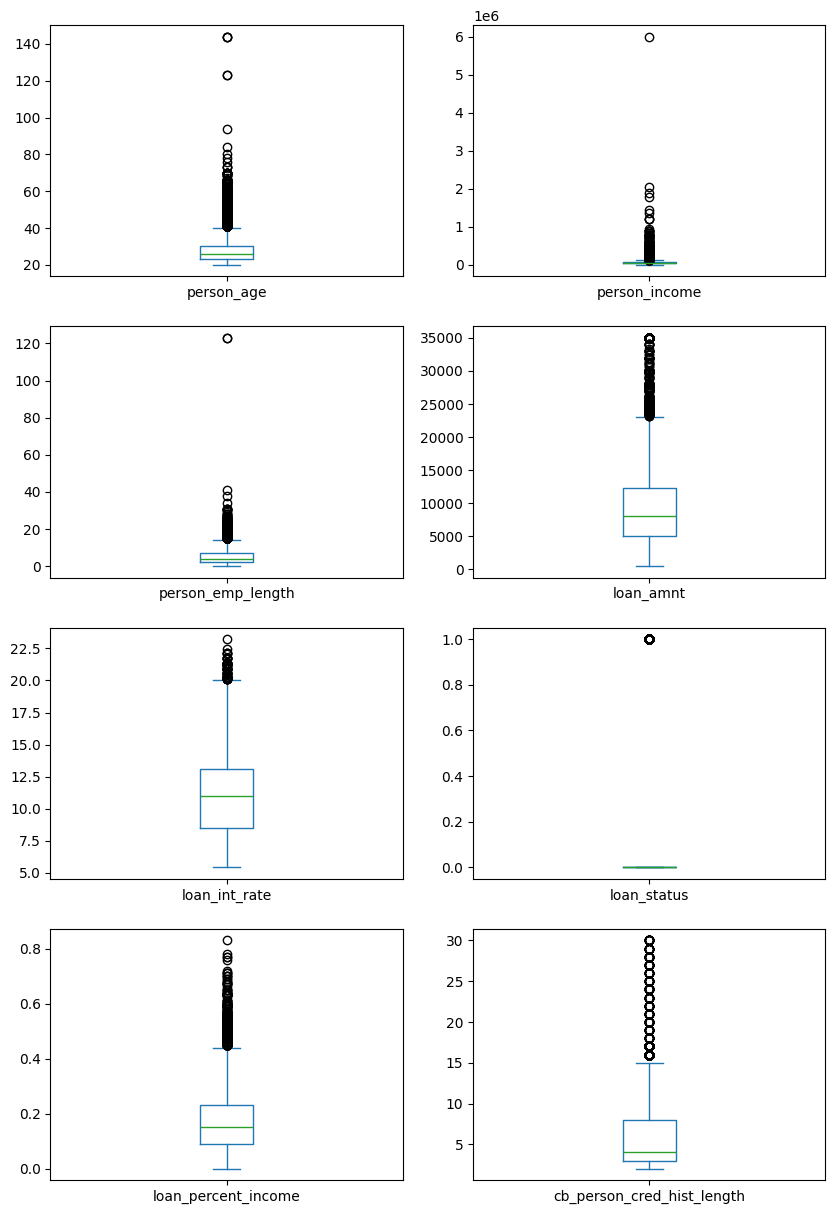

In [17]:
df_numeric.plot(kind='box' , subplots=True , layout=(4,2) , figsize = (10,15) )

In [18]:
from feature_engine.outliers import Winsorizer

In [19]:
wins = Winsorizer(capping_method='quantiles' , tail='both' , fold = 3)
wins.fit(df_numeric)
numeric_df = wins.transform(df_numeric)

person_age                       Axes(0.125,0.712609;0.352273x0.167391)
person_income                 Axes(0.547727,0.712609;0.352273x0.167391)
person_emp_length                Axes(0.125,0.511739;0.352273x0.167391)
loan_amnt                     Axes(0.547727,0.511739;0.352273x0.167391)
loan_int_rate                     Axes(0.125,0.31087;0.352273x0.167391)
loan_status                    Axes(0.547727,0.31087;0.352273x0.167391)
loan_percent_income                  Axes(0.125,0.11;0.352273x0.167391)
cb_person_cred_hist_length        Axes(0.547727,0.11;0.352273x0.167391)
dtype: object

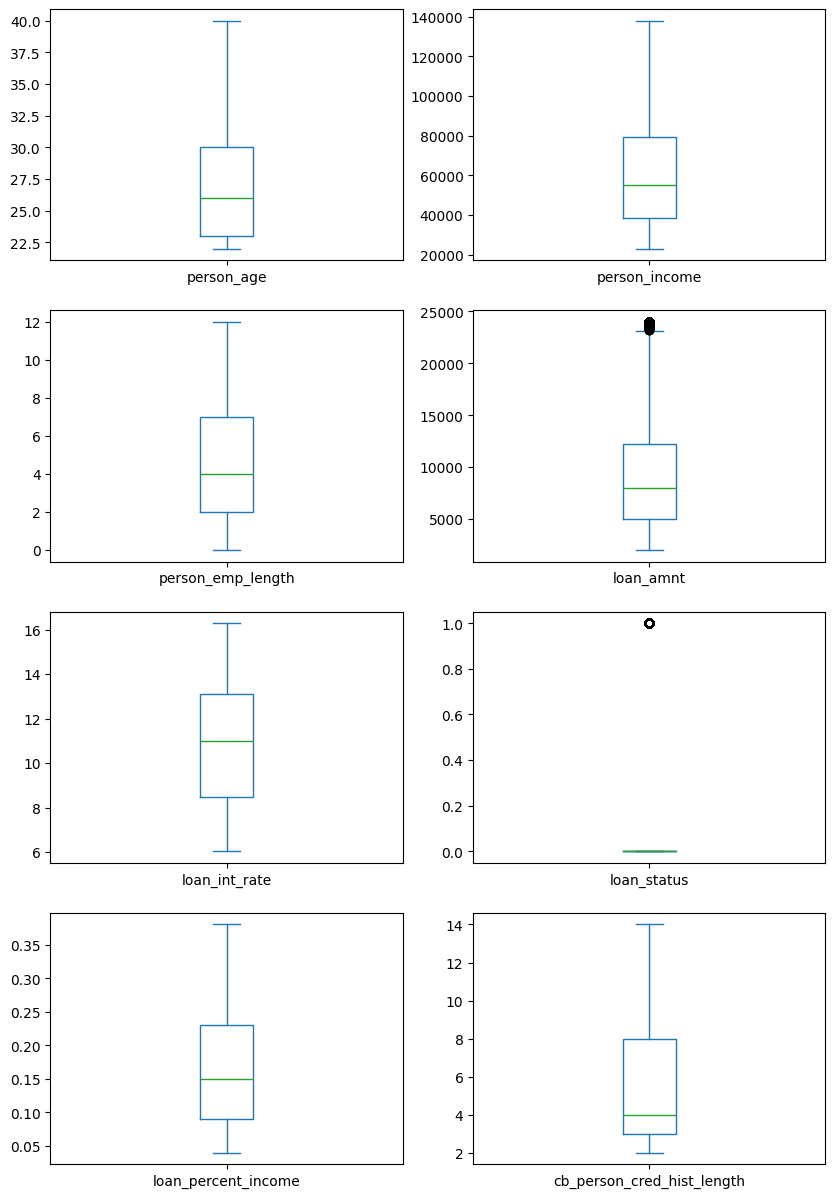

In [20]:
numeric_df.plot(kind='box' , subplots=True , layout=(4,2) , figsize=(10,15))

In [21]:
df['loan_status'] = df['loan_status'].astype('object')

In [22]:
numeric_df['loan_status'].replace(0 , "No" , inplace=True)
numeric_df['loan_status'].replace(1 , "Yes" , inplace=True)

In [23]:
df = pd.concat([numeric_df , df_cat] , axis = 1)

In [24]:
df

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file
0,22,59000,12.0,24000,16.02,Yes,0.38,3,RENT,PERSONAL,D,Y
1,22,22932,5.0,2000,11.14,No,0.10,2,OWN,EDUCATION,B,N
2,25,22932,1.0,5500,12.87,Yes,0.38,3,MORTGAGE,MEDICAL,C,N
3,23,65500,4.0,24000,15.23,Yes,0.38,2,RENT,MEDICAL,C,N
4,24,54400,8.0,24000,14.27,Yes,0.38,4,RENT,MEDICAL,C,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,40,53000,1.0,5800,13.16,No,0.11,14,MORTGAGE,PERSONAL,C,N
32577,40,120000,4.0,17625,7.49,No,0.15,14,MORTGAGE,PERSONAL,A,N
32578,40,76000,3.0,24000,10.99,Yes,0.38,14,RENT,HOMEIMPROVEMENT,B,N
32579,40,138000,5.0,15000,11.48,No,0.10,14,MORTGAGE,PERSONAL,B,N


**Univariate Analysis**

In [28]:
import matplotlib.pyplot as plt